# 5장 딥러닝

In [43]:
# calc1.py  # 214페이지
# TensorFlow 추출하기 --- (※1)
import tensorflow as tf
# 상수 정의 --- (※2)
a = tf.constant(1234)
b = tf.constant(5000)
# 계산 정의 --- (※3)
add_op = a + b
# 세션 시작하기 --- (※4)
sess = tf.Session()
res = sess.run(add_op) # 식 평가하기
print(res)

6234


In [44]:
# calc2.py  # 215페이지
# TensorFlow 읽어 들이기 --- (※1)
import tensorflow as tf
# 상수 정의하기 --- (※2)
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(4)
# 연산 정의하기 --- (※3)
calc1_op = a + b * c
calc2_op = (a + b) * c
# 세션 시작하기 --- (※4)
sess = tf.Session()
res1 = sess.run(calc1_op) # 식 평가하기
print(res1)
res2 = sess.run(calc2_op) # 식 평가하기
print(res2)

14
20


In [45]:
# 223페이지
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [46]:
# a + b 연산
a = tf.constant(100)
b = tf.constant(50)
add_op = a + b
# 변수 v 선언
v = tf.Variable(0)
# 변수 v에 add_op의 결과 대입
let_op = tf.assign(v, add_op)
# 세션 시작하기
sess = tf.Session()
# 변수 초기화
sess.run(tf.global_variables_initializer())
# let_op 실행
sess.run(let_op)
# 출력하기
print(sess.run(v))

150


In [47]:
# var.py  # 225페이지
import tensorflow as tf
# 상수 정의하기 --- (※1)
a = tf.constant(120, name="a")
b = tf.constant(130, name="b")
c = tf.constant(140, name="c")
# 변수 정의하기 --- (※2)
v = tf.Variable(0, name="v")
# 데이터 플로우 그래프 정의하기 --- (※3)
calc_op = a + b + c
assign_op = tf.assign(v, calc_op)
# 세션 실행하기 --- (※4)
sess = tf.Session()
sess.run(assign_op)
# v의 내용 출력하기 --- (※5)
print( sess.run(v) )

390


In [48]:
# placeholder1.py  # 227페이지
import tensorflow as tf
# 플레이스홀더 정의하기 --- (※1)
a = tf.placeholder(tf.int32, [3]) # 정수 자료형 3개를 가진 배열
# 배열을 모든 값을 2배하는 연산 정의하기 --- (※2)
b = tf.constant(2)
x2_op = a * b
# 세션 시작하기 --- (※3)
sess = tf.Session()
# 플레이스홀더에 값을 넣고 실행하기 --- (※4)
r1 = sess.run(x2_op, feed_dict={ a:[1, 2, 3] })
print(r1)
r2 = sess.run(x2_op, feed_dict={ a:[10, 20, 10] })
print(r2)

[2 4 6]
[20 40 20]


In [49]:
# placeholder2.py  # 228페이지
import tensorflow as tf
# 플레이스홀더 정의하기 --- (※1)
a = tf.placeholder(tf.int32, [None]) # 배열의 크기를 None으로 지정
# 배열의 모든 값을 10배하는 연산 정의하기 
b = tf.constant(10)
x10_op = a * b
# 세션 시작하기 
sess = tf.Session()
# 플레이스홀더에 값을 넣어 실행하기 --- (※2)
r1 = sess.run(x10_op, feed_dict={a: [1,2,3,4,5]})
print(r1)
r2 = sess.run(x10_op, feed_dict={a: [10,20]})
print(r2)

[10 20 30 40 50]
[100 200]


In [51]:
# bmi.py  # 229페이지
import pandas as pd
import numpy as np
import tensorflow as tf
# 키, 몸무게, 레이블이 적힌 CSV 파일 읽어 들이기 --- (※1)
csv = pd.read_csv("bmi.csv")
# 데이터 정규화 --- (※2)
csv["height"] = csv["height"] / 200
csv["weight"] = csv["weight"] / 100
# 레이블을 배열로 변환하기 --- (※3)
# - thin=(1,0,0) / normal=(0,1,0) / fat=(0,0,1)
bclass = {"thin": [1,0,0], "normal": [0,1,0], "fat": [0,0,1]}
csv["label_pat"] = csv["label"].apply(lambda x : np.array(bclass[x]))
# 테스트를 위한 데이터 분류 --- (※4)
test_csv = csv[15000:20000]
test_pat = test_csv[["weight","height"]]
test_ans = list(test_csv["label_pat"])
# 데이터 플로우 그래프 구출하기 --- (※5)
# 플레이스홀더 선언하기
x  = tf.placeholder(tf.float32, [None, 2]) # 키와 몸무게 데이터 넣기
y_ = tf.placeholder(tf.float32, [None, 3]) # 정답 레이블 넣기
# 변수 선언하기 --- (※6)
W = tf.Variable(tf.zeros([2, 3])); # 가중치
b = tf.Variable(tf.zeros([3])); # 바이어스
# 소프트맥스 회귀 정의하기 --- (※7)
y = tf.nn.softmax(tf.matmul(x, W) + b)
# 모델 훈련하기 --- (※8)
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(cross_entropy)
# 정답률 구하기
predict = tf.equal(tf.argmax(y, 1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))
# 세션 시작하기
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 변수 초기화하기
# 학습시키기
for step in range(3500):
    i = (step * 100) % 14000
    rows = csv[1 + i : 1 + i + 100]
    x_pat = rows[["weight","height"]]
    y_ans = list(rows["label_pat"])
    fd = {x: x_pat, y_: y_ans}
    sess.run(train, feed_dict=fd)
    if step % 500 == 0:
        cre = sess.run(cross_entropy, feed_dict=fd)
        acc = sess.run(accuracy, feed_dict={x: test_pat, y_: test_ans})
        print("step=", step, "cre=", cre, "acc=", acc)
# 최종적인 정답률 구하기
acc = sess.run(accuracy, feed_dict={x: test_pat, y_: test_ans})
print("정답률 =", acc)

step= 0 cre= 106.37915 acc= 0.3886
step= 500 cre= 56.43612 acc= 0.877
step= 1000 cre= 45.035755 acc= 0.8888
step= 1500 cre= 40.50499 acc= 0.9494
step= 2000 cre= 34.834927 acc= 0.9566
step= 2500 cre= 30.413074 acc= 0.9524
step= 3000 cre= 26.863832 acc= 0.9726
정답률 = 0.9708


In [54]:
# mnist-deep.py

# 실행 결과
# 정답률 = 0.9898
# 실행에 소요된 시간= 1448.7613089084625 초
# 24.146021815141044 분

import time
startTime = time.time()

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data 
# MNIST 손글씨 이미지 데이터 읽어 들이기 --- (※1)
mnist = input_data.read_data_sets("mnist/", one_hot=True)
pixels = 28 * 28 # 28x28 픽셀
nums = 10 # 0-9 사이의 카테고리
# 플레이스홀더 정의하기 --- (※2)
x  = tf.placeholder(tf.float32, shape=(None, pixels), name="x") # 이미지 데이터
y_ = tf.placeholder(tf.float32, shape=(None, nums), name="y_")  # 정답 레이블
# 가중치와 바이어스를 초기화하는 함수 --- (※3)
def weight_variable(name, shape):
    W_init = tf.truncated_normal(shape, stddev=0.1)
    W = tf.Variable(W_init, name="W_"+name)
    return W
def bias_variable(name, size):
    b_init = tf.constant(0.1, shape=[size])
    b = tf.Variable(b_init, name="b_"+name)
    return b
# 합성곱 계층을 만드는 함수 --- (※4)
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')
# 최대 풀링층을 만드는 함수 --- (※5)
def max_pool(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1],
        strides=[1,2,2,1], padding='SAME')
# 합성곱층1 --- (※6)
with tf.name_scope('conv1') as scope:
    W_conv1 = weight_variable('conv1', [5, 5, 1, 32])
    b_conv1 = bias_variable('conv1', 32)
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
# 풀링층1 ---- (※7)
with tf.name_scope('pool1') as scope:
    h_pool1 = max_pool(h_conv1)
# 합성곱층2 --- (※8)
with tf.name_scope('conv2') as scope:
    W_conv2 = weight_variable('conv2', [5, 5, 32, 64])
    b_conv2 = bias_variable('conv2', 64)
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
# 풀링층2 --- (※9)
with tf.name_scope('pool2') as scope:
    h_pool2 = max_pool(h_conv2)
# 전결합층 --- (※10)
with tf.name_scope('fully_connected') as scope:
    n = 7 * 7 * 64
    W_fc = weight_variable('fc', [n, 1024])
    b_fc = bias_variable('fc', 1024)
    h_pool2_flat = tf.reshape(h_pool2, [-1, n])
    h_fc = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc) + b_fc)        
# 드롭아웃(과잉 적합) 막기 --- (※11)
with tf.name_scope('dropout') as scope:
    keep_prob = tf.placeholder(tf.float32)
    h_fc_drop = tf.nn.dropout(h_fc, keep_prob)
# 출력층 --- (※12)
with tf.name_scope('readout') as scope:
    W_fc2 = weight_variable('fc2', [1024, 10])
    b_fc2 = bias_variable('fc2', 10)
    y_conv = tf.nn.softmax(tf.matmul(h_fc_drop, W_fc2) + b_fc2)
# 모델 학습시키기 --- (※13)
with tf.name_scope('loss') as scope:
    cross_entoropy = -tf.reduce_sum(y_ * tf.log(y_conv))
with tf.name_scope('training') as scope:
    optimizer = tf.train.AdamOptimizer(1e-4)
    train_step = optimizer.minimize(cross_entoropy)
# 모델 평가하기 --- (※14)
with tf.name_scope('predict') as scope:
    predict_step = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    accuracy_step = tf.reduce_mean(tf.cast(predict_step, tf.float32))
# feed_dict 설정하기 --- (※15)
def set_feed(images, labels, prob):
    return {x: images, y_: labels, keep_prob: prob}
# 세션 시작하기 --- (※16)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # TensorBoard 준비하기
    tw = tf.summary.FileWriter('log_dir', graph=sess.graph)
    # 테스트 전용 피드 만들기
    test_fd = set_feed(mnist.test.images, mnist.test.labels, 1)
    # 학습 시작하기 ---- (※17)
    for step in range(10000):
        batch = mnist.train.next_batch(50)
        fd = set_feed(batch[0], batch[1], 0.5)
        _, loss = sess.run([train_step, cross_entoropy], feed_dict=fd)
        if step % 100 == 0:
            acc = sess.run(accuracy_step, feed_dict=test_fd)
            print("step=", step, "loss=", loss, "acc=", acc)
    # 최종적인 결과 출력하기
    acc = sess.run(accuracy_step, feed_dict=test_fd)
    print("정답률 =", acc)

endTime = time.time() - startTime
print("실행에 소요된 시간=", endTime, '초')
if endTime / 60 > 1: print( endTime/60, '분')

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
step= 0 loss= 496.01663 acc= 0.0774
step= 100 loss= 53.783875 acc= 0.8472
step= 200 loss= 18.275791 acc= 0.9123
step= 300 loss= 22.569038 acc= 0.9255
step= 400 loss= 13.547099 acc= 0.942
step= 500 loss= 7.975542 acc= 0.9433
step= 600 loss= 20.11247 acc= 0.9511
step= 700 loss= 6.341138 acc= 0.9553
step= 800 loss= 8.168967 acc= 0.9587
step= 900 loss= 15.777517 acc= 0.9589
step= 1000 loss= 16.998135 acc= 0.9621
step= 1100 loss= 9.336069 acc= 0.9635
step= 1200 loss= 8.705875 acc= 0.9664
step= 1300 loss= 3.0321345 acc= 0.9678
step= 1400 loss= 10.832233 acc= 0.9682
step= 1500 loss= 2.7140934 acc= 0.9726
step= 1600 loss= 5.0193505 acc= 0.9704
step= 1700 loss= 12.5396385 acc= 0.9722
step= 1800 loss= 1.9614592 acc= 0.9737
step= 1900 loss= 7.711295 acc= 0.9771
step= 2000 loss= 5.4312544 acc= 0.9781
step= 2100 loss= 2.786618 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.images[0].shape

(784,)

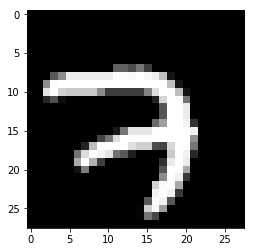

In [6]:
plt.imshow(mnist.train.images[0].reshape([28,28]), cmap="gray")

In [7]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])  # 입력 데이터 x, None은 나중에 사용할 배치 사이즈 크기, 아직 미정.
W = tf.Variable(tf.zeros([784, 10]))  # 가중치 W, 10은 결과 0~9, 10가지
b = tf.Variable(tf.zeros([10]))  # 바이어스 b
y = tf.nn.softmax(tf.matmul(x, W) + b)  # 입력 데이터인 x에 tf.matmul로 W를 곱하고 b를 더한다음, tf.nn.softmax로 소프트맥스를 얹는다.
y_ = tf.placeholder(tf.float32, [None, 10])  # 실제 값
# 여기서는 cross entropy를 사용해 모델의 정확성을 측정한다. 이는 예측값의 로그에 실제값을 곱한 값을 모두 합치고 그 평균값으로 계산한다.
# reduction_indices는 reduce_sum이 합하는 축을 의미한다.
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
# cross_entropy가 최저가 되는 지점을 찾아야 한다. tensorflow는 이를 위한 아주 편리한 기능을 제공한다.
# tf.train.GradientDescentOptimizer를 불러 learning_rate을 지정한다음, cross_entropy를 최소화하라고만 하면 된다.
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
# 그 다음은 성능 측정이다. 트레이닝 셋이 아닌 모델이 아직 보지 못한 테스트셋을 대상으로 accuracy를 산출한다.
# tf.argmax를 사용해서 소프트맥스로 계산한 확률 중 가장 높은 값과 실제값을 비교해서 correct_prediction을 계산하고,
# 이를 평균내어 accuracy를 구한다.
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# 이제 tf.Session()으로 세션을 열어 앞서 정의한 오퍼레이션을 돌리기만 하면 된다.
# 주의 : 앞서 Variable로 W와 b를 정의했는데, 이 값을 초기화(initialize)해줘야 한다.
# GradientDescent 방식으로 최적의 해를 점진적으로 찾아가는 방식을 취하므로, epoch을 돌면서 batch데이터를 기반으로 학습을 수행한다.
# 즉, 이 과정을 간단히 정리하면, 먼저 세션을 열고, 초기값을 이니셜라이즈한 다음, 각 epoch에 대해 트레이닝 셋을 불러와서 모델을 학습시킨다.
# 그리고 적절한 스텝마다 테스트셋을 대상으로 Validation Accuracy를 측정한다.
# 세션을 열기 전에 epoch 횟수같은 하이퍼파라미터 일부를 먼저 정의해주면 편하다.
epoch = 1000
batch_size = 100

loss_list = []
val_list = []
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    for e in range(epoch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, loss = sess.run([train_step, cross_entropy],
                          feed_dict={x: batch_xs, y_: batch_ys})
        loss_list.append({"epoch":e, "loss": loss})
        print("epoch: %s // training loss: %s" %(e, loss))

        if (e % 10 == 0) | (e == epoch-1):
            val_acc = (sess.run(accuracy,
                              feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
            val_list.append({"epoch":e, "val_acc": val_acc})
            print("epoch: %s // valiation accuracy: %s" %(e, val_acc))

epoch: 0 // training loss: 2.30259
epoch: 0 // valiation accuracy: 0.2259
epoch: 1 // training loss: 2.03965
epoch: 2 // training loss: 1.76454
epoch: 3 // training loss: 1.61577
epoch: 4 // training loss: 1.70085
epoch: 5 // training loss: 1.97365
epoch: 6 // training loss: 1.45617
epoch: 7 // training loss: 1.1229
epoch: 8 // training loss: 1.05172
epoch: 9 // training loss: 0.842011
epoch: 10 // training loss: 0.946765
epoch: 10 // valiation accuracy: 0.7147
epoch: 11 // training loss: 0.964005
epoch: 12 // training loss: 0.768
epoch: 13 // training loss: 0.882704
epoch: 14 // training loss: 0.675936
epoch: 15 // training loss: 0.746585
epoch: 16 // training loss: 0.751588
epoch: 17 // training loss: 0.628051
epoch: 18 // training loss: 0.726805
epoch: 19 // training loss: 0.623169
epoch: 20 // training loss: 0.631469
epoch: 20 // valiation accuracy: 0.8539
epoch: 21 // training loss: 0.619379
epoch: 22 // training loss: 0.629309
epoch: 23 // training loss: 0.642558
epoch: 24 // tra

epoch: 210 // valiation accuracy: 0.9071
epoch: 211 // training loss: 0.389523
epoch: 212 // training loss: 0.414053
epoch: 213 // training loss: 0.429218
epoch: 214 // training loss: 0.280435
epoch: 215 // training loss: 0.199033
epoch: 216 // training loss: 0.329175
epoch: 217 // training loss: 0.357748
epoch: 218 // training loss: 0.439305
epoch: 219 // training loss: 0.288059
epoch: 220 // training loss: 0.390524
epoch: 220 // valiation accuracy: 0.9062
epoch: 221 // training loss: 0.332165
epoch: 222 // training loss: 0.382242
epoch: 223 // training loss: 0.431747
epoch: 224 // training loss: 0.429787
epoch: 225 // training loss: 0.458962
epoch: 226 // training loss: 0.354731
epoch: 227 // training loss: 0.444569
epoch: 228 // training loss: 0.369657
epoch: 229 // training loss: 0.387877
epoch: 230 // training loss: 0.437468
epoch: 230 // valiation accuracy: 0.9033
epoch: 231 // training loss: 0.38957
epoch: 232 // training loss: 0.326239
epoch: 233 // training loss: 0.410152
epoc

epoch: 420 // valiation accuracy: 0.9149
epoch: 421 // training loss: 0.283313
epoch: 422 // training loss: 0.450968
epoch: 423 // training loss: 0.36385
epoch: 424 // training loss: 0.423479
epoch: 425 // training loss: 0.320138
epoch: 426 // training loss: 0.24143
epoch: 427 // training loss: 0.382499
epoch: 428 // training loss: 0.3232
epoch: 429 // training loss: 0.395665
epoch: 430 // training loss: 0.219516
epoch: 430 // valiation accuracy: 0.9107
epoch: 431 // training loss: 0.406111
epoch: 432 // training loss: 0.320826
epoch: 433 // training loss: 0.301168
epoch: 434 // training loss: 0.285048
epoch: 435 // training loss: 0.219099
epoch: 436 // training loss: 0.278652
epoch: 437 // training loss: 0.299759
epoch: 438 // training loss: 0.466881
epoch: 439 // training loss: 0.266262
epoch: 440 // training loss: 0.319372
epoch: 440 // valiation accuracy: 0.9118
epoch: 441 // training loss: 0.150719
epoch: 442 // training loss: 0.497699
epoch: 443 // training loss: 0.206286
epoch: 

epoch: 630 // valiation accuracy: 0.9142
epoch: 631 // training loss: 0.222923
epoch: 632 // training loss: 0.307503
epoch: 633 // training loss: 0.654488
epoch: 634 // training loss: 0.2537
epoch: 635 // training loss: 0.303935
epoch: 636 // training loss: 0.410886
epoch: 637 // training loss: 0.262189
epoch: 638 // training loss: 0.37785
epoch: 639 // training loss: 0.346151
epoch: 640 // training loss: 0.469358
epoch: 640 // valiation accuracy: 0.9143
epoch: 641 // training loss: 0.509472
epoch: 642 // training loss: 0.237922
epoch: 643 // training loss: 0.337561
epoch: 644 // training loss: 0.486052
epoch: 645 // training loss: 0.24165
epoch: 646 // training loss: 0.360268
epoch: 647 // training loss: 0.335791
epoch: 648 // training loss: 0.261299
epoch: 649 // training loss: 0.177556
epoch: 650 // training loss: 0.313228
epoch: 650 // valiation accuracy: 0.9179
epoch: 651 // training loss: 0.276301
epoch: 652 // training loss: 0.435321
epoch: 653 // training loss: 0.162325
epoch: 

epoch: 828 // training loss: 0.326374
epoch: 829 // training loss: 0.222026
epoch: 830 // training loss: 0.489436
epoch: 830 // valiation accuracy: 0.9142
epoch: 831 // training loss: 0.387463
epoch: 832 // training loss: 0.284688
epoch: 833 // training loss: 0.210318
epoch: 834 // training loss: 0.327472
epoch: 835 // training loss: 0.179884
epoch: 836 // training loss: 0.22044
epoch: 837 // training loss: 0.335541
epoch: 838 // training loss: 0.255815
epoch: 839 // training loss: 0.278497
epoch: 840 // training loss: 0.304758
epoch: 840 // valiation accuracy: 0.9194
epoch: 841 // training loss: 0.463786
epoch: 842 // training loss: 0.330166
epoch: 843 // training loss: 0.250893
epoch: 844 // training loss: 0.365955
epoch: 845 // training loss: 0.339987
epoch: 846 // training loss: 0.26152
epoch: 847 // training loss: 0.237354
epoch: 848 // training loss: 0.247467
epoch: 849 // training loss: 0.384475
epoch: 850 // training loss: 0.353255
epoch: 850 // valiation accuracy: 0.9171
epoch

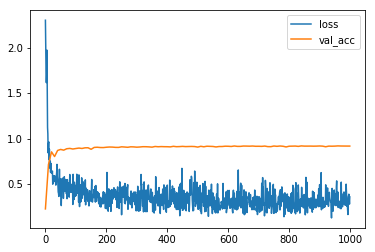

In [8]:
import pandas as pd

l_df = pd.DataFrame.from_dict(loss_list)
l_df.set_index('epoch', inplace=True)

v_df = pd.DataFrame.from_dict(val_list)
v_df.set_index('epoch', inplace=True)


plt.plot(l_df, label="loss")
plt.plot(v_df, label="val_acc")
plt.legend()
plt.show()

# Keras

In [1]:
# Keras 버전 체크
# $ python -c 'import keras; print(keras.__version__)'
# Using TensorFlow backend.
# 2.1.4

In [2]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.1.4


In [3]:
# 케라스 설치, 설정 확인
# $ pip install keras

# $ cat ~/.keras/keras.json
# {
#     "floatx": "float32",
#     "epsilon": 1e-07,
#     "backend": "tensorflow",
#     "image_data_format": "channels_last"
# }

In [4]:
# keras-mnist.py

import time
startTime = time.time()

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam 
from keras.utils import np_utils
# MNIST 데이터 읽어 들이기 --- (※1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 데이터를 float32 자료형으로 변환하고 정규화하기 --- (※2)
X_train = X_train.reshape(60000, 784).astype('float32')
X_test  = X_test.reshape(10000, 784).astype('float')
X_train /= 255
X_test  /= 255
# 레이블 데이터를 0-9까지의 카테고리를 나타내는 배열로 변환하기 --- (※2a)
y_train = np_utils.to_categorical(y_train, 10)
y_test  = np_utils.to_categorical(y_test, 10)
# 모델 구조 정의하기 --- (※3)
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
# 모델 구축하기 --- (※4)
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy'])
# 데이터 훈련하기 --- (※5)
hist = model.fit(X_train, y_train)
# 테스트 데이터로 평가하기 --- (※6)
score = model.evaluate(X_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])

endTime = time.time() - startTime
print("실행에 소요된 시간=", endTime, '초')
if endTime / 60 > 1: print( endTime/60, '분')

11493376/11490434 [==============================] - 30s 3us/step
Epoch 1/1
10000/10000 [==============================] - 0s 49us/step
loss= 0.10326205089427531
accuracy= 0.9678
실행에 소요된 시간= 49.966705083847046 초


In [6]:
# keras-bmi.py

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import pandas as pd, numpy as np
# BMI 데이터를 읽어 들이고 정규화하기 --- (※1)
csv = pd.read_csv("bmi.csv")
# 몸무게와 키 데이터
csv["weight"] /= 100
csv["height"] /= 200
X = csv[["weight", "height"]].as_matrix() # --- (※1a)
# 레이블
bclass = {"thin":[1,0,0], "normal":[0,1,0], "fat":[0,0,1]}
y = np.empty((20000,3))
for i, v in enumerate(csv["label"]):
    y[i] = bclass[v]
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기 --- (※2)
X_train, y_train = X[1:15001], y[1:15001]
X_test,  y_test  = X[15001:20001], y[15001:20001] 
# 모델 구조 정의하기 --- (※3)
model = Sequential()
model.add(Dense(512, input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(3))
model.add(Activation('softmax'))
# 모델 구축하기 --- (※4)
model.compile(
    loss='categorical_crossentropy',
    optimizer="rmsprop",
    metrics=['accuracy'])
# 데이터 훈련하기 --- (※5)
# hist = model.fit(
#     X_train, y_train,
#     batch_size=100,
#     nb_epoch=20,
#     validation_split=0.1,
#     callbacks=[EarlyStopping(monitor='val_loss', patience=2)],
#     verbose=1)

# UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
#   warnings.warn('The `nb_epoch` argument in `fit` '

hist = model.fit(
    X_train, y_train,
    batch_size=100,
    epochs=20,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2)],
    verbose=1)

# 테스트 데이터로 평가하기 --- (※6)
score = model.evaluate(X_test, y_test)
print('loss=', score[0])
print('accuracy=', score[1])

Train on 13500 samples, validate on 1500 samples
Epoch 1/20
13500/13500 [==============================] - 1s 90us/step - loss: 0.5158 - acc: 0.7906 - val_loss: 0.2581 - val_acc: 0.9233
Epoch 2/20
13500/13500 [==============================] - 1s 52us/step - loss: 0.2486 - acc: 0.9001 - val_loss: 0.1612 - val_acc: 0.9493
Epoch 3/20
13500/13500 [==============================] - 1s 52us/step - loss: 0.1840 - acc: 0.9264 - val_loss: 0.1228 - val_acc: 0.9680
Epoch 4/20
13500/13500 [==============================] - 1s 55us/step - loss: 0.1664 - acc: 0.9252 - val_loss: 0.1204 - val_acc: 0.9507
Epoch 5/20
13500/13500 [==============================] - 1s 55us/step - loss: 0.1488 - acc: 0.9348 - val_loss: 0.1411 - val_acc: 0.9267
Epoch 6/20
4999/4999 [==============================] - 0s 30us/step
loss= 0.28369452845313403
accuracy= 0.8667733546947808


# Pandas, Numpy 다루기

In [7]:
# pd-test-filter.py  # 266
import pandas as pd
# 키, 몸무게, 유형 데이터프레임 생성하기
tbl = pd.DataFrame({
    "weight": [ 80.0, 70.4, 65.5, 45.9, 51.2, 72.5 ],
    "height": [ 170,  180,  155,  143,  154,  160  ],
    "gender": [ "f",  "m",  "m",  "f",  "f",  "m"  ]
})
print("--- height가 160 이상인 것")
print(tbl[tbl.height >= 160])
print("--- gender가 m 인 것")
print(tbl[tbl.gender == "m"])

--- height가 160 이상인 것
  gender  height  weight
0      f     170    80.0
1      m     180    70.4
5      m     160    72.5
--- gender가 m 인 것
  gender  height  weight
1      m     180    70.4
2      m     155    65.5
5      m     160    72.5


In [8]:
# pd-test-sort.py  # 266
import pandas as pd
# 키, 몸무게, 유형 데이터프레임 생성하기
tbl = pd.DataFrame({
    "weight": [ 80.0, 70.4, 65.5, 45.9, 51.2, 72.5 ],
    "height": [ 170,  180,  155,  143,  154,  160  ],
    "gender": [ "f",  "m",  "m",  "f",  "f",  "m"  ]
})
print("--- 키로 정렬")
print(tbl.sort_values(by="height"))
print("--- 몸무게로 정렬")
print(tbl.sort_values(by="weight", ascending=False))

--- 키로 정렬
  gender  height  weight
3      f     143    45.9
4      f     154    51.2
2      m     155    65.5
5      m     160    72.5
0      f     170    80.0
1      m     180    70.4
--- 몸무게로 정렬
  gender  height  weight
0      f     170    80.0
5      m     160    72.5
1      m     180    70.4
2      m     155    65.5
4      f     154    51.2
3      f     143    45.9


In [9]:
# pd-test-rot.py  # 267
import pandas as pd
tbl = pd.DataFrame([
    ["A", "B", "C"],
    ["D", "E", "F"],
    ["G", "H", "I"]
])
print(tbl)
print("-----")
print(tbl.T)

   0  1  2
0  A  B  C
1  D  E  F
2  G  H  I
-----
   0  1  2
0  A  D  G
1  B  E  H
2  C  F  I


In [10]:
# pd-test-norm2.py  # 270
import pandas as pd
# 키, 체중, 유형 데이터프레임 생성하기
tbl = pd.DataFrame({
    "weight": [ 80.0, 70.4, 65.5, 45.9, 51.2, 72.5 ],
    "height": [ 170,  180,  155,  143,  154,  160  ],
    "gender": [ "f",  "m",  "m",  "f",  "f",  "m"  ]
})
# 키와 몸무게 정규화하기
# 최댓값과 최솟값 구하기
def norm(tbl, key):
    c = tbl[key]
    v_max = c.max()
    v_min = c.min()
    print(key, "=", v_min, "-", v_max)
    tbl[key] = (c - v_min) / (v_max - v_min)
norm(tbl, "weight")
norm(tbl, "height")
print(tbl)

weight = 45.9 - 80.0
height = 143 - 180
  gender    height    weight
0      f  0.729730  1.000000
1      m  1.000000  0.718475
2      m  0.324324  0.574780
3      f  0.000000  0.000000
4      f  0.297297  0.155425
5      m  0.459459  0.780059


In [22]:
import pandas as pd
data = pd.read_csv('convenient_store.csv')
data.head()

,area,company,hourly_wage,area1,area2,outlier,name
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
area           177 non-null object
company        177 non-null object
hourly_wage    177 non-null int64
area1          177 non-null object
area2          177 non-null object
outlier        177 non-null int64
name           177 non-null object
dtypes: int64(2), object(5)
memory usage: 9.8+ KB


In [24]:
data.describe()
# describe() 함수는 전체 혹은 int로 구성된 특정 컬럼 데이터의 빈도, 평균, 편차, 최소값, 25%, 50%, 75%, 최대값을 자동으로 뽑아줍니다.

,hourly_wage,outlier
count,177.000000,177.0
mean,5787.627119,0.0
std,352.318646,0.0
min,5580.000000,0.0
25%,5580.000000,0.0
50%,5600.000000,0.0
75%,6000.000000,0.0
max,7500.000000,0.0


In [54]:
data.area.describe()

count         177
unique        117
top       강남구 논현동
freq            7
Name: area, dtype: object

In [56]:
high_wage = data[data.hourly_wage > 6000] # 이번에는 필터를 걸어보겠습니다. 전체 데이터를 대상으로 시급이 6000원 이상인 항목을 프린트해봅니다.
high_wage

,area,company,hourly_wage,area1,area2,outlier,name,more_than_6000
13,영등포구 영등포동,gs25,6300,영등포구,영등포동,0,gs25,1
18,강남구 논현동,세븐일레븐 논현11호점,6200,강남구,논현동,0,7/11,1
29,강남구 논현동,세븐일레븐편의점,7500,강남구,논현동,0,7/11,1
30,강남구 청담동,세븐일레븐 청담그린점,6500,강남구,청담동,0,7/11,1
37,강서구 등촌동,세븐일레븐 서울호서대점,6600,강서구,등촌동,0,7/11,1
53,구로구 구로4동,세븐일레븐 구로리공원점,6500,구로구,구로4동,0,7/11,1
56,구로구 개봉동,세븐일레븐/개봉점,6200,구로구,개봉동,0,7/11,1
60,도봉구 창동,세븐일레븐,6500,도봉구,창동,0,7/11,1
61,동대문구 장안동,세븐일레븐장안바우점,6300,동대문구,장안동,0,7/11,1
72,마포구 동교동,세븐일레븐 마포홍익점,6500,마포구,동교동,0,7/11,1


In [58]:
high_wage.sort_values(by='hourly_wage', ascending=0).head(10)

,area,company,hourly_wage,area1,area2,outlier,name,more_than_6000
173,용산구 이태원동,CU 이태원프리덤점,7500,용산구,이태원동,0,CU,1
29,강남구 논현동,세븐일레븐편의점,7500,강남구,논현동,0,7/11,1
160,서대문구 신촌동,BGF Retail CU 신촌세브란스병원점,6900,서대문구,신촌동,0,CU,1
135,중구 명동2가,세븐일레븐,6690,중구,명동2가,0,7/11,1
37,강서구 등촌동,세븐일레븐 서울호서대점,6600,강서구,등촌동,0,7/11,1
172,용산구 한남동,CU 한남리첸시아점,6600,용산구,한남동,0,CU,1
30,강남구 청담동,세븐일레븐 청담그린점,6500,강남구,청담동,0,7/11,1
53,구로구 구로4동,세븐일레븐 구로리공원점,6500,구로구,구로4동,0,7/11,1
60,도봉구 창동,세븐일레븐,6500,도봉구,창동,0,7/11,1
161,서대문구 현저동,CU 독립문극동점,6500,서대문구,현저동,0,CU,1


In [59]:
# 이중으로 필터를 넣어봤습니다. &는 and, |는 or를 의미합니다. 여기서는 마포구에 있으면서 시급이 6천원보다 큰 데이터를 뽑아봤습니다.
# 마포구 동교동 세븐일레븐 1건이 나옵니다. 
b = data[(data.area1 == '마포구') & (data.hourly_wage > 6000)]
b

,area,company,hourly_wage,area1,area2,outlier,name,more_than_6000
72,마포구 동교동,세븐일레븐 마포홍익점,6500,마포구,동교동,0,7/11,1


In [27]:
cu = data[data.company.str.contains('CU')]
# 데이터에서 회사 컬럼에 CU라는 명칭이 들어간 경우 (예: CU 한남리첸시아점) 이를 따로 서브셋으로 따로 추려 cu라는 변수에 할당합니다
cu

,area,company,hourly_wage,area1,area2,outlier,name
141,강남구 논현동,CU 논현힐탑점,5600,강남구,논현동,0,CU
142,강남구 논현동,CU논현한미점,6000,강남구,논현동,0,CU
143,강남구 신사동,CU 로데오점,6100,강남구,신사동,0,CU
144,강남구 대치4동,CU 대치본점,6000,강남구,대치4동,0,CU
145,강남구 논현1동,CUBE pc방,6500,강남구,논현1동,0,CU
146,강북구 수유3동,CU수유중앙점,5600,강북구,수유3동,0,CU
147,강서구 방화동,CU방화오피스점,6000,강서구,방화동,0,CU
148,관악구 신원동,CU신림인석점,5580,관악구,신원동,0,CU
149,관악구 봉천동,CU관악상상점,5580,관악구,봉천동,0,CU
150,구로구 구로동,CU편의점(고대구로병원1호점),5580,구로구,구로동,0,CU


In [60]:
data['seoul'] = 'in seoul'
data.head()

,area,company,hourly_wage,area1,area2,outlier,name,more_than_6000,seoul
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25,0,in seoul
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25,0,in seoul
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25,0,in seoul
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25,0,in seoul
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25,0,in seoul


In [69]:
data['more_than_6000'] = data.hourly_wage > 6000
data.head()

,area,company,hourly_wage,area1,area2,outlier,name,more_than_6000
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25,False
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25,False
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25,False
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25,False
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25,False


In [70]:
data[data.more_than_6000 == True].describe()

,hourly_wage,outlier
count,25.000000,25.0
mean,6518.000000,0.0
std,343.923441,0.0
min,6100.000000,0.0
25%,6300.000000,0.0
50%,6500.000000,0.0
75%,6500.000000,0.0
max,7500.000000,0.0


In [73]:
# pandas 라이브러리 불러오기
import pandas as pd

# csv 파일 불러와서 pandas 데이터프레임으로 저장하기
data = pd.read_csv('convenient_store.csv')

# # 데이터 프레임 확인하기
# print( data.head() )
# print( data.info() )
# print( data.describe() )

# `more than 6000` 함수 정의하기
def more_than_6000(x):
    if x > 6000:
        return 1
    else:
        return 0

# 'more_than_6000' 열 추가하기
data['more_than_6000'] = data.hourly_wage.map(lambda x: more_than_6000(x))
print( data.head() )

# '서브셋 만들기'
data2 = data[data.more_than_6000 == 1][['area1', 'hourly_wage']]
data2 = data2.sort_values(by='hourly_wage', ascending=0)
print( data2.head(10) )

# csv 파일로 출력하기
data2.to_csv('data2.csv', index=False)

      area     company  hourly_wage area1 area2  outlier  name  more_than_6000
0  강남구 삼성동  gs25 오크우드점         5600   강남구   삼성동        0  gs25               0
1  강남구 삼성동   gs25 코엑스점         5700   강남구   삼성동        0  gs25               0
2  강서구 화곡동     gs25편의점         5600   강서구   화곡동        0  gs25               0
3  광진구 군자동        gs25         5580   광진구   군자동        0  gs25               0
4  광진구 중곡동   gs25중곡대원점         5580   광진구   중곡동        0  gs25               0
    area1  hourly_wage
173   용산구         7500
29    강남구         7500
160  서대문구         6900
135    중구         6690
37    강서구         6600
172   용산구         6600
30    강남구         6500
53    구로구         6500
60    도봉구         6500
161  서대문구         6500


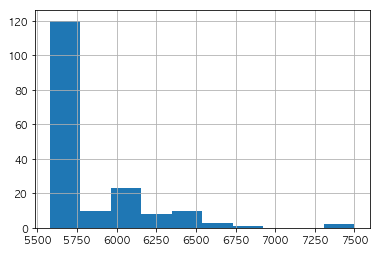

In [74]:
import matplotlib.pyplot as plt
data.hourly_wage.hist(bins=10)  # 전체 편의점 데이터의 시급을 히스토그램으로 그리는데, 구간은 10개 구간으로 정하겠습니다
plt.show()

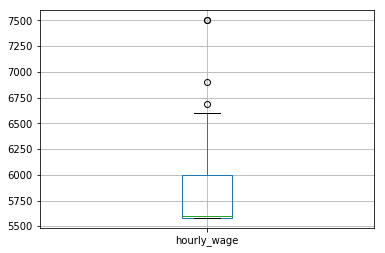

In [31]:
data.boxplot(column='hourly_wage')  # 이번에는 같은 데이터를 박스플롯으로 표현해봅시다. 
plt.show()

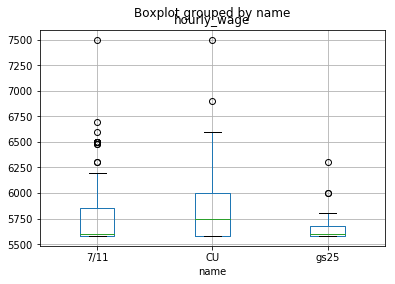

In [32]:
# 이번에는 회사별로 박스플롯을 돌려봅시다. 데이터에 name이라는 컬럼에 회사명이 표시되어있습니다.
# 이를 by='name'이라는 부분에 집어넣어 옵션으로 지정해주면 간단하게 박스플롯 3개가 한번에 그려집니다.
data.boxplot(column='hourly_wage', by='name')
plt.show()

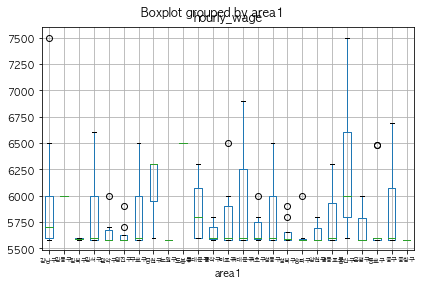

In [53]:
# 구별 히스토그램을 뽑을 수 있습니다.
import matplotlib
data.boxplot(column='hourly_wage', by='area1')
matplotlib.rc('font',family='AppleGothic')
matplotlib.pyplot.xticks(fontsize=6)
plt.tight_layout()
plt.show()

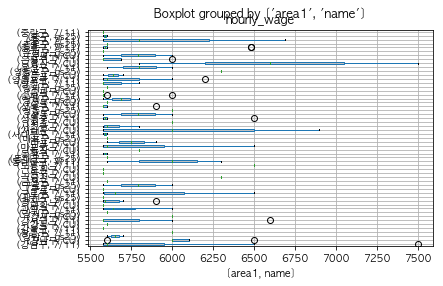

In [78]:
# 이번에는 구별로 회사를 나누어 박스플롯으로 출력하는데, 세로가 아닌 가로로 플롯을 그려봅시다.
# vert=False는 박스플롯을 가로로 그리는 옵션입니다.
data.boxplot(column='hourly_wage', by=['area1', 'name'], vert=False)
matplotlib.rc('font',family='AppleGothic')
matplotlib.pyplot.yticks(fontsize=9)
plt.show()